In [1]:
hiapp = ['2021-03-03_IAPP_2n5_sliceA_0V_dt_extracted.txt', '2021-03-03_IAPP_2n5_sliceA_10V_dt_extracted.txt', '2021-03-03_IAPP_2n5_sliceA_20V_dt_extracted.txt', '2021-03-03_IAPP_2n5_sliceA_30V_dt_extracted.txt', '2021-03-03_IAPP_2n5_sliceA_40V_dt_extracted.txt', '2021-03-03_IAPP_2n5_sliceA_50V_dt_extracted.txt', '2021-03-03_IAPP_2n5_sliceA_60V_dt_extracted.txt', '2021-03-03_IAPP_2n5_sliceA_70V_dt_extracted.txt']
XData = []
YData = []

for filename in hiapp:
    filenameparts = filename.split('_')
    voltage = filenameparts[4].replace('V', '')
    voltage = int(voltage)
    arrtime = []
    intensity = []
    xdata = []
    ydata = []
    with open (filename, 'r') as f:
        for dataline in f:
            dataline = dataline.replace('\n', '')
            arrtime_intensity = dataline.split('\t')
            arrtime.append(float(arrtime_intensity[0]))
            intensity.append(int(arrtime_intensity[1]))
        #print(len(intensity))
        #print(sum(i > 0 for i in intensity))
    for index, intensity_value in enumerate(intensity):
        if intensity_value > 0.0:
            #n = int(10.0 * np.log2(intensity_value))
            n = int(intensity_value/100.)
            xdata += [arrtime[index]]*n
    
    ydata = [voltage]*len(xdata)
    XData.extend(xdata)
    YData.extend(ydata)
    arrtime = []
    intensity = []
    xdata = []
    ydata = []


import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

XArr = np.array(XData)
YArr = np.array(YData)
XYArr = np.column_stack((XArr,YArr))

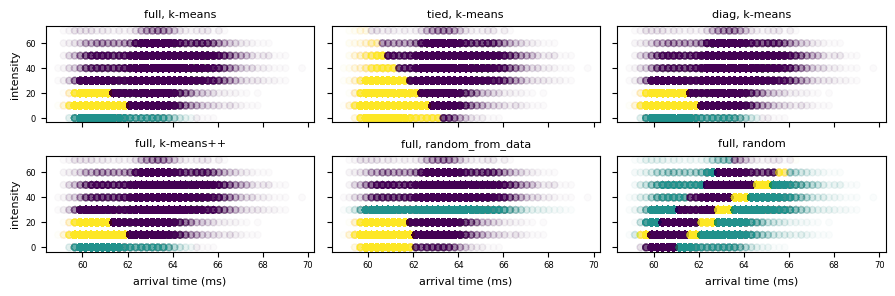

In [19]:
SMALL_SIZE = 6
MEDIUM_SIZE = 8
BIGGER_SIZE = 10

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title

fig, axarr = plt.subplots(2,3, sharex = 'col', sharey='row')
fig.set_size_inches(9,3)
#axarr = [ax1, ax2, ax3, ax4, ax5, ax6]

ax1 = axarr[0,0]
gm2 = GaussianMixture(n_components=3, max_iter=100, covariance_type='full', random_state=1).fit(XYArr)
labels = gm2.predict(XYArr)
ax1.scatter(XArr, YArr, c=labels, cmap = 'viridis', s=24, alpha=0.02)
ax1.set_title('full, k-means')

ax2 = axarr[0,1]
gm3 = GaussianMixture(n_components=3, max_iter=100, covariance_type='tied', random_state=1).fit(XYArr)
labels = gm3.predict(XYArr)
ax2.scatter(XArr, YArr, c=labels, cmap = 'viridis', s=24, alpha=0.02)
ax2.set_title('tied, k-means')

ax3 = axarr[0,2]
gm4 = GaussianMixture(n_components=3, max_iter=100, covariance_type='diag', random_state=1).fit(XYArr)
labels = gm4.predict(XYArr)
ax3.scatter(XArr, YArr, c=labels, cmap = 'viridis', s=24, alpha=0.02)
ax3.set_title('diag, k-means')

ax4 = axarr[1,0]
gm2 = GaussianMixture(n_components=3, max_iter=100, covariance_type='full', init_params='k-means++', random_state=1).fit(XYArr)
labels = gm2.predict(XYArr)
ax4.scatter(XArr, YArr, c=labels, cmap = 'viridis', s=24, alpha=0.02)
ax4.set_title('full, k-means++')

ax5 = axarr[1,1]
gm3 = GaussianMixture(n_components=3, max_iter=100, covariance_type='full', init_params='random_from_data', random_state=1).fit(XYArr)
labels = gm3.predict(XYArr)
ax5.scatter(XArr, YArr, c=labels, cmap = 'viridis', s=24, alpha=0.02)
ax5.set_title('full, random_from_data')

ax6 = axarr[1,2]
gm4 = GaussianMixture(n_components=3, max_iter=100, covariance_type='full', init_params='random', random_state=1).fit(XYArr)
labels = gm4.predict(XYArr)
ax6.scatter(XArr, YArr, c=labels, cmap = 'viridis', s=24, alpha=0.02)
ax6.set_title('full, random')

for ax in axarr.flat:
    ax.set(xlabel='arrival time (ms)', ylabel='intensity')
    #ax.set_ylim(0,80)
for ax in axarr.flat:
    ax.label_outer()

plt.tight_layout()

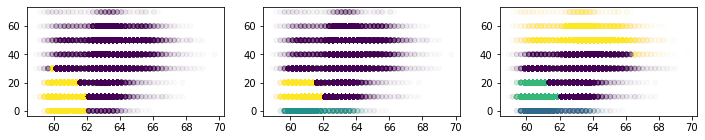

In [23]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(12,2)

plt.subplot(1,3,1)
gm2 = GaussianMixture(n_components=2, max_iter=100, covariance_type='diag', random_state=1).fit(XYArr)
labels = gm2.predict(XYArr)
plt.scatter(XArr, YArr, c=labels, cmap = 'viridis', s=24, alpha=0.02)

plt.subplot(1,3,2)
gm3 = GaussianMixture(n_components=3, max_iter=100, covariance_type='diag', random_state=1).fit(XYArr)
labels = gm3.predict(XYArr)
plt.scatter(XArr, YArr, c=labels, cmap = 'viridis', s=24, alpha=0.02)

plt.subplot(1,3,3)
gm4 = GaussianMixture(n_components=4, max_iter=100, covariance_type='diag', random_state=1).fit(XYArr)
labels = gm4.predict(XYArr)
plt.scatter(XArr, YArr, c=labels, cmap = 'viridis', s=24, alpha=0.02)

plt.show()

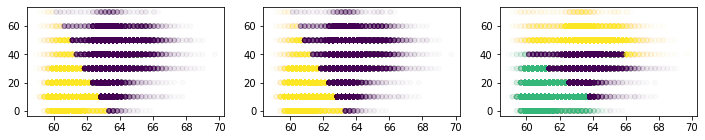

In [27]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(12,2)

plt.subplot(1,3,1)
gm2 = GaussianMixture(n_components=3, max_iter=100, covariance_type='full', random_state=1).fit(XYArr)
labels = gm2.predict(XYArr)
plt.scatter(XArr, YArr, c=labels, cmap = 'viridis', s=24, alpha=0.02)

plt.subplot(1,3,2)
gm3 = GaussianMixture(n_components=3, max_iter=100, covariance_type='tied', random_state=1).fit(XYArr)
labels = gm3.predict(XYArr)
plt.scatter(XArr, YArr, c=labels, cmap = 'viridis', s=24, alpha=0.02)

plt.subplot(1,3,3)
gm4 = GaussianMixture(n_components=4, max_iter=100, covariance_type='tied', random_state=1).fit(XYArr)
labels = gm4.predict(XYArr)
plt.scatter(XArr, YArr, c=labels, cmap = 'viridis', s=24, alpha=0.02)

plt.show()

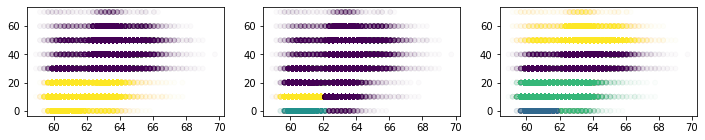

In [28]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(12,2)

plt.subplot(1,3,1)
gm2 = GaussianMixture(n_components=2, max_iter=100, covariance_type='spherical', random_state=1).fit(XYArr)
labels = gm2.predict(XYArr)
plt.scatter(XArr, YArr, c=labels, cmap = 'viridis', s=24, alpha=0.02)

plt.subplot(1,3,2)
gm3 = GaussianMixture(n_components=3, max_iter=100, covariance_type='spherical', random_state=1).fit(XYArr)
labels = gm3.predict(XYArr)
plt.scatter(XArr, YArr, c=labels, cmap = 'viridis', s=24, alpha=0.02)

plt.subplot(1,3,3)
gm4 = GaussianMixture(n_components=4, max_iter=100, covariance_type='spherical', random_state=1).fit(XYArr)
labels = gm4.predict(XYArr)
plt.scatter(XArr, YArr, c=labels, cmap = 'viridis', s=24, alpha=0.02)

plt.show()

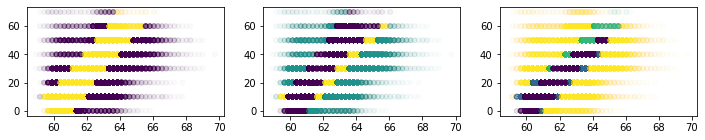

In [29]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(12,2)

plt.subplot(1,3,1)
gm2 = GaussianMixture(n_components=2, covariance_type='full', max_iter=100, init_params='random', random_state=1).fit(XYArr)
labels = gm2.predict(XYArr)
plt.scatter(XArr, YArr, c=labels, cmap = 'viridis', s=24, alpha=0.02)

plt.subplot(1,3,2)
gm3 = GaussianMixture(n_components=3, covariance_type='full', max_iter=100, init_params='random', random_state=1).fit(XYArr)
labels = gm3.predict(XYArr)
plt.scatter(XArr, YArr, c=labels, cmap = 'viridis', s=24, alpha=0.02)

plt.subplot(1,3,3)
gm4 = GaussianMixture(n_components=4, covariance_type='full', max_iter=100, init_params='random', random_state=1).fit(XYArr)
labels = gm4.predict(XYArr)
plt.scatter(XArr, YArr, c=labels, cmap = 'viridis', s=24, alpha=0.02)

plt.show()

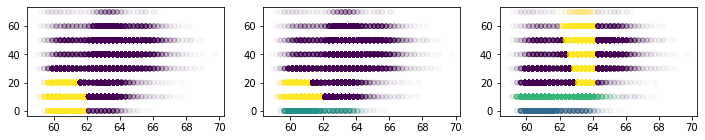

In [30]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(12,2)

plt.subplot(1,3,1)
gm2 = GaussianMixture(n_components=2, covariance_type='full', max_iter=100, init_params='k-means++', random_state=1).fit(XYArr)
labels = gm2.predict(XYArr)
plt.scatter(XArr, YArr, c=labels, cmap = 'viridis', s=24, alpha=0.02)

plt.subplot(1,3,2)
gm3 = GaussianMixture(n_components=3, covariance_type='full', max_iter=100, init_params='k-means++', random_state=1).fit(XYArr)
labels = gm3.predict(XYArr)
plt.scatter(XArr, YArr, c=labels, cmap = 'viridis', s=24, alpha=0.02)

plt.subplot(1,3,3)
gm4 = GaussianMixture(n_components=4, covariance_type='full', max_iter=100, init_params='k-means++', random_state=1).fit(XYArr)
labels = gm4.predict(XYArr)
plt.scatter(XArr, YArr, c=labels, cmap = 'viridis', s=24, alpha=0.02)

plt.show()

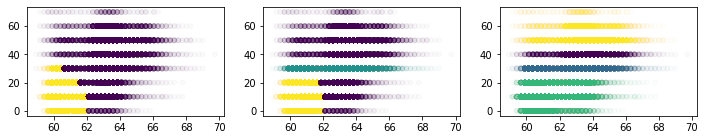

In [31]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(12,2)

plt.subplot(1,3,1)
gm2 = GaussianMixture(n_components=2, covariance_type='full', max_iter=100, init_params='random_from_data', random_state=1).fit(XYArr)
labels = gm2.predict(XYArr)
plt.scatter(XArr, YArr, c=labels, cmap = 'viridis', s=24, alpha=0.02)

plt.subplot(1,3,2)
gm3 = GaussianMixture(n_components=3, covariance_type='full', max_iter=100, init_params = 'random_from_data', random_state=1).fit(XYArr)
labels = gm3.predict(XYArr)
plt.scatter(XArr, YArr, c=labels, cmap = 'viridis', s=24, alpha=0.02)

plt.subplot(1,3,3)
gm4 = GaussianMixture(n_components=4, covariance_type='full', max_iter=100, init_params = 'random_from_data', random_state=1).fit(XYArr)
labels = gm4.predict(XYArr)
plt.scatter(XArr, YArr, c=labels, cmap = 'viridis', s=24, alpha=0.02)

plt.show()

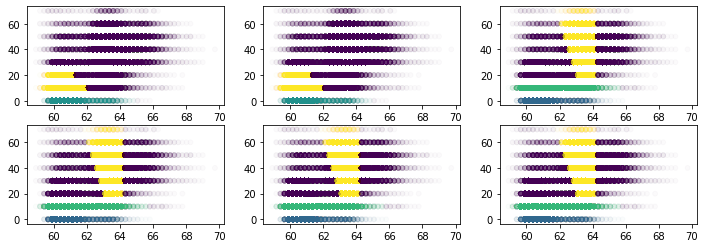

In [36]:
fig, ax = plt.subplots(2,3)
fig.set_size_inches(12,4)

plt.subplot(2,3,1)
gm3 = GaussianMixture(n_components=3, covariance_type='full', max_iter=10, random_state=1).fit(XYArr)
labels = gm3.predict(XYArr)
plt.scatter(XArr, YArr, c=labels, cmap = 'viridis', s=24, alpha=0.02)

plt.subplot(2,3,2)
gm3 = GaussianMixture(n_components=3, covariance_type='full', max_iter=20, random_state=1).fit(XYArr)
labels = gm3.predict(XYArr)
plt.scatter(XArr, YArr, c=labels, cmap = 'viridis', s=24, alpha=0.02)

plt.subplot(2,3,3)
gm4 = GaussianMixture(n_components=4, covariance_type='full', max_iter=40, random_state=1).fit(XYArr)
labels = gm4.predict(XYArr)
plt.scatter(XArr, YArr, c=labels, cmap = 'viridis', s=24, alpha=0.02)

plt.subplot(2,3,4)
gm4 = GaussianMixture(n_components=4, covariance_type='full', max_iter=80, random_state=1).fit(XYArr)
labels = gm4.predict(XYArr)
plt.scatter(XArr, YArr, c=labels, cmap = 'viridis', s=24, alpha=0.02)

plt.subplot(2,3,5)
gm4 = GaussianMixture(n_components=4, covariance_type='full', max_iter=160,  random_state=1).fit(XYArr)
labels = gm4.predict(XYArr)
plt.scatter(XArr, YArr, c=labels, cmap = 'viridis', s=24, alpha=0.02)

plt.subplot(2,3,6)
gm4 = GaussianMixture(n_components=4, covariance_type='full', max_iter=320,  random_state=1).fit(XYArr)
labels = gm4.predict(XYArr)
plt.scatter(XArr, YArr, c=labels, cmap = 'viridis', s=24, alpha=0.02)
plt.show()


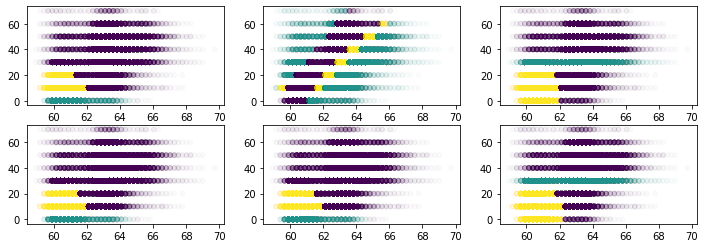

In [40]:
fig, ax = plt.subplots(2,3)
fig.set_size_inches(12,4)

plt.subplot(2,3,1)
gm = GaussianMixture(n_components=3, covariance_type='full', max_iter=160, random_state=1).fit(XYArr)
labels = gm.predict(XYArr)
plt.scatter(XArr, YArr, c=labels, cmap = 'viridis', s=24, alpha=0.02)

plt.subplot(2,3,2)
gm = GaussianMixture(n_components=3, covariance_type='full', max_iter=160, init_params='random', random_state=1).fit(XYArr)
labels = gm.predict(XYArr)
plt.scatter(XArr, YArr, c=labels, cmap = 'viridis', s=24, alpha=0.02)

plt.subplot(2,3,3)
gm = GaussianMixture(n_components=3, covariance_type='full', max_iter=160, init_params='random_from_data', random_state=1).fit(XYArr)
labels = gm.predict(XYArr)
plt.scatter(XArr, YArr, c=labels, cmap = 'viridis', s=24, alpha=0.02)

plt.subplot(2,3,4)
gm = GaussianMixture(n_components=3, covariance_type='diag', max_iter=160, random_state=1).fit(XYArr)
labels = gm.predict(XYArr)
plt.scatter(XArr, YArr, c=labels, cmap = 'viridis', s=24, alpha=0.02)

plt.subplot(2,3,5)
gm = GaussianMixture(n_components=3, covariance_type='diag', max_iter=160, init_params='random', random_state=1).fit(XYArr)
labels = gm3.predict(XYArr)
plt.scatter(XArr, YArr, c=labels, cmap = 'viridis', s=24, alpha=0.02)

plt.subplot(2,3,6)
gm3 = GaussianMixture(n_components=3, covariance_type='diag', max_iter=160, init_params='random_from_data', random_state=1).fit(XYArr)
labels = gm3.predict(XYArr)
plt.scatter(XArr, YArr, c=labels, cmap = 'viridis', s=24, alpha=0.02)

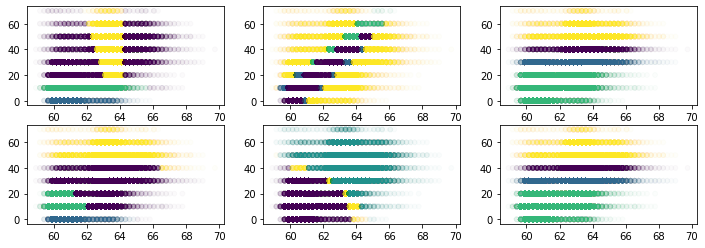

In [41]:
fig, ax = plt.subplots(2,3)
fig.set_size_inches(12,4)

plt.subplot(2,3,1)
gm4 = GaussianMixture(n_components=4, covariance_type='full', max_iter=160, random_state=1).fit(XYArr)
labels = gm4.predict(XYArr)
plt.scatter(XArr, YArr, c=labels, cmap = 'viridis', s=24, alpha=0.02)

plt.subplot(2,3,2)
gm4 = GaussianMixture(n_components=4, covariance_type='full', max_iter=160, init_params='random', random_state=1).fit(XYArr)
labels = gm4.predict(XYArr)
plt.scatter(XArr, YArr, c=labels, cmap = 'viridis', s=24, alpha=0.02)

plt.subplot(2,3,3)
gm4 = GaussianMixture(n_components=4, covariance_type='full', max_iter=160, init_params='random_from_data', random_state=1).fit(XYArr)
labels = gm4.predict(XYArr)
plt.scatter(XArr, YArr, c=labels, cmap = 'viridis', s=24, alpha=0.02)

plt.subplot(2,3,4)
gm4 = GaussianMixture(n_components=4, covariance_type='diag', max_iter=160, random_state=1).fit(XYArr)
labels = gm4.predict(XYArr)
plt.scatter(XArr, YArr, c=labels, cmap = 'viridis', s=24, alpha=0.02)

plt.subplot(2,3,5)
gm4 = GaussianMixture(n_components=4, covariance_type='diag', max_iter=160, init_params='random', random_state=1).fit(XYArr)
labels = gm4.predict(XYArr)
plt.scatter(XArr, YArr, c=labels, cmap = 'viridis', s=24, alpha=0.02)

plt.subplot(2,3,6)
gm4 = GaussianMixture(n_components=4, covariance_type='diag', max_iter=160, init_params='random_from_data', random_state=1).fit(XYArr)
labels = gm4.predict(XYArr)
plt.scatter(XArr, YArr, c=labels, cmap = 'viridis', s=24, alpha=0.02)

In [ ]:
##conclusion is to use full covariance and kmeans. long winded way of going bakc to default settings!
##ncomp seems best at 4
##but what's going on with the first two voltages?
##and 